In [479]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast

from src.google_funcs import * 

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [484]:
folder_id = '11Th_WqG7aXmDUMaFh9DRPDrTUqPe1ZR2'

In [ ]:
service = authenticate_google_drive(credential_path='credentials.json')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=518071906717-v9u09ju361d057evkqv0i1qb5jssj8r9.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A64733%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.file&state=4M9q4rDAudZfelVFs4MojFegmNAatn&access_type=offline


In [66]:
minimalism = pd.read_excel('datos\minimalism.xlsx', index_col=0)

In [420]:
minimalism["subcategoria"] = minimalism["subcategoria"].apply(lambda x: x if x!='Jerséis' else 'Jerseis')

In [67]:
minimalism["opciones_de_color"] = minimalism["opciones_de_color"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [89]:
n_prod_colors = minimalism.explode("opciones_de_color").groupby(["nombre", "opciones_de_color"]).count().shape[0]
n_prod_unicos = len(minimalism.nombre.unique())
print(n_prod_colors, n_prod_unicos)

217 92


In [69]:
minimalism_exploded_color = minimalism.explode("opciones_de_color")

In [75]:
# minimalism_exploded_color[(minimalism_exploded_color["categoria"] == "Mujer") & (minimalism_exploded_color["subcategoria"] == "Camisetas")]

In [71]:
minimalism.dtypes

nombre                object
opiniones            float64
rating                object
precio               float64
opciones_de_color     object
tamaños               object
co2                  float64
agua                  object
energia              float64
categoria             object
subcategoria          object
subsubcategoria       object
dtype: object

In [81]:
(minimalism["categoria"] == "Mujer").sum()

58

In [80]:
(minimalism["categoria"] == "Hombre").sum()

116

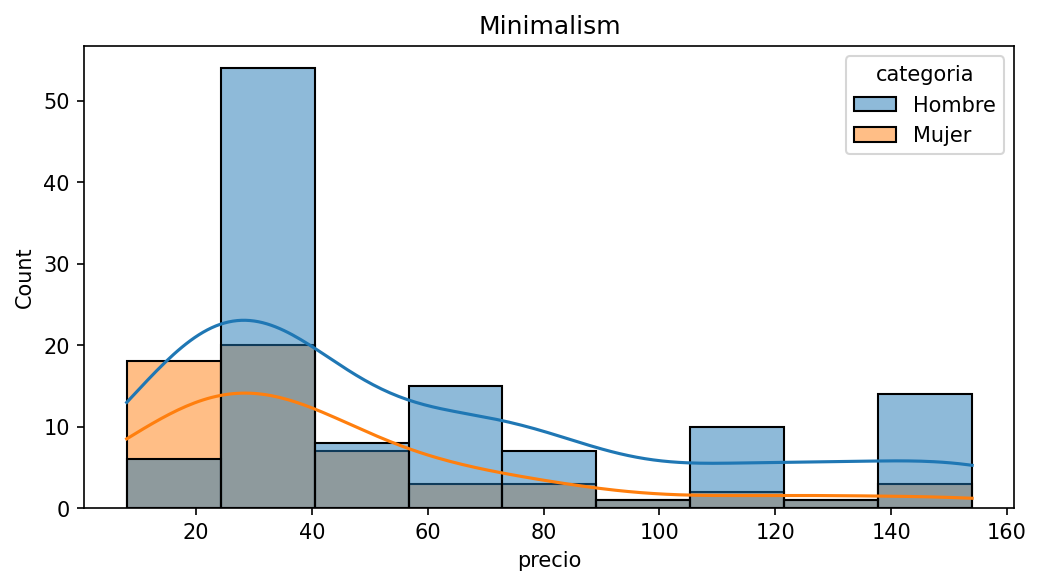

In [132]:
plt.figure(figsize=(8,4), dpi = 150)
plt.title("Minimalism")
sns.histplot(data=minimalism[(minimalism["categoria"] == "Hombre") | (minimalism["categoria"] == "Mujer")], x = "precio", hue = "categoria", kde = True)
plt.show()

In [96]:
mini_hombre = minimalism[(minimalism["categoria"] == "Hombre")]
mini_mujer = minimalism[(minimalism["categoria"] == "Mujer")]

In [251]:
n_prod_unicos_h = len(mini_hombre.nombre.unique())
n_prod_unicos_m = len(mini_mujer.nombre.unique())
print(n_prod_unicos_h,n_prod_unicos_m)

53 51


In [278]:
minimalism["subcategoria"].unique()

array(['Camisetas', 'Ropa interior', 'Sudaderas', 'Calcetines', 'Polos',
       'Jerséis', 'Pantalones', 'Mochilas', 'Accesorios', 'Jerseis',
       'Toallas de baño', nan], dtype=object)

In [296]:
minimalism.drop(index = minimalism[minimalism["nombre"].duplicated()].index)[~minimalism.drop(index = minimalism[minimalism["nombre"].duplicated()].index)["subsubcategoria"].str.contains("Packs", na = False)]["subcategoria"].value_counts()

subcategoria
Camisetas          20
Ropa interior      18
Calcetines         12
Mochilas           12
Pantalones          5
Accesorios          5
Jerséis             3
Toallas de baño     3
Sudaderas           2
Name: count, dtype: int64

In [301]:
mini_no_dup_no_packs = minimalism.drop(index = minimalism[minimalism["nombre"].duplicated()].index)[~minimalism.drop(index = minimalism[minimalism["nombre"].duplicated()].index)["subsubcategoria"].str.contains("Packs", na = False)]

mini_no_dup_no_packs.groupby("categoria")["precio"].median()

categoria
Hombre    32.0
Mujer     24.0
Niño      29.5
Unisex    22.0
Name: precio, dtype: float64

In [102]:
def test_norm(df, col, sig_level):
    media = np.mean(df[col])
    sd = np.std(df[col])
    normal = np.random.normal(loc = media, scale = sd, size = df[col].shape[0])   
    pval = stats.kstest(df[col], normal).pvalue
    if pval < sig_level:
        print("Se rechaza la hipotesis nula, no es normal.")
    elif pval > sig_level:
        print("No se rechaza la hipótesis nula, es normal.")
    return stats.kstest(df[col], normal)
def get_test(dep, *samples):
    if len(samples) > 2:
        print("More than 2 samples:")
        return stats.kruskal(*samples)
    elif len(samples) == 2:
        print("2 samples:")
        if dep:
            return stats.wilcoxon(*samples)
        else:
            return stats.mannwhitneyu(*samples)
    print("Necesitas al menos 2 muestras.")

In [101]:
test_norm(mini_hombre, "precio", 0.05)
test_norm(mini_mujer, "precio", 0.05)

Se rechaza la hipotesis nula, no es normal.
No se rechaza la hipótesis nula, es normal.


KstestResult(statistic=0.2413793103448276, pvalue=0.06788392444850913, statistic_location=38.0, statistic_sign=1)

In [103]:
get_test(False, mini_hombre["precio"], mini_mujer["precio"])

2 samples:


MannwhitneyuResult(statistic=4026.5, pvalue=0.03323256798025085)

In [106]:
mini_generos = pd.concat([mini_hombre, mini_mujer])

In [111]:
mini_generos["categoria"].unique()

array(['Hombre', 'Mujer'], dtype=object)

In [302]:
mini_generos.groupby("categoria")["precio"].median()

categoria
Hombre    39.0
Mujer     34.0
Name: precio, dtype: float64

In [305]:
mini_no_dup_no_packs.groupby("subcategoria")["precio"].median()

subcategoria
Accesorios         15.0
Calcetines         22.0
Camisetas          25.0
Jerséis            75.0
Mochilas           34.0
Pantalones         55.0
Ropa interior      32.0
Sudaderas          60.0
Toallas de baño    17.0
Name: precio, dtype: float64

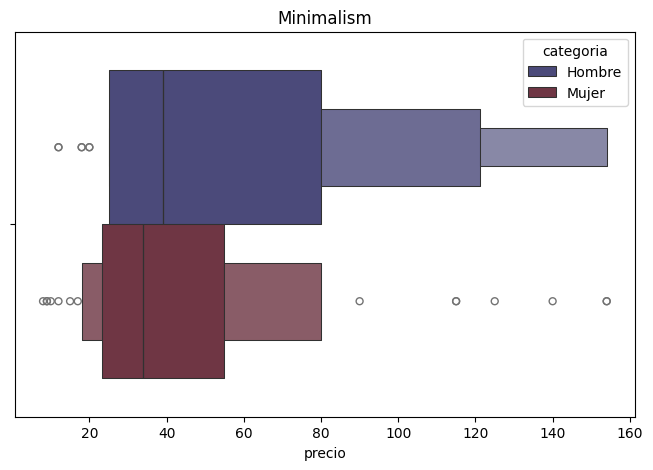

In [136]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Minimalism")
sns.boxenplot(mini_generos, x = "precio", hue = "categoria", palette="icefire")
plt.show()

In [73]:
blaugab = pd.read_excel(r'datos\blaugab.xlsx', index_col=0)

In [127]:
blaugab_genero = blaugab[(blaugab["Categoria"] == "mujer") | (blaugab["Categoria"] == "hombre")]

In [129]:
blaugab_mujer = blaugab[(blaugab["Categoria"] == "mujer")]
blaugab_hombre = blaugab[(blaugab["Categoria"] == "hombre")]

In [131]:
test_norm(blaugab_hombre, "Precio", 0.05)
test_norm(blaugab_mujer, "Precio", 0.05)

Se rechaza la hipotesis nula, no es normal.
Se rechaza la hipotesis nula, no es normal.


KstestResult(statistic=0.2127659574468085, pvalue=4.522883172789131e-05, statistic_location=44.95, statistic_sign=1)

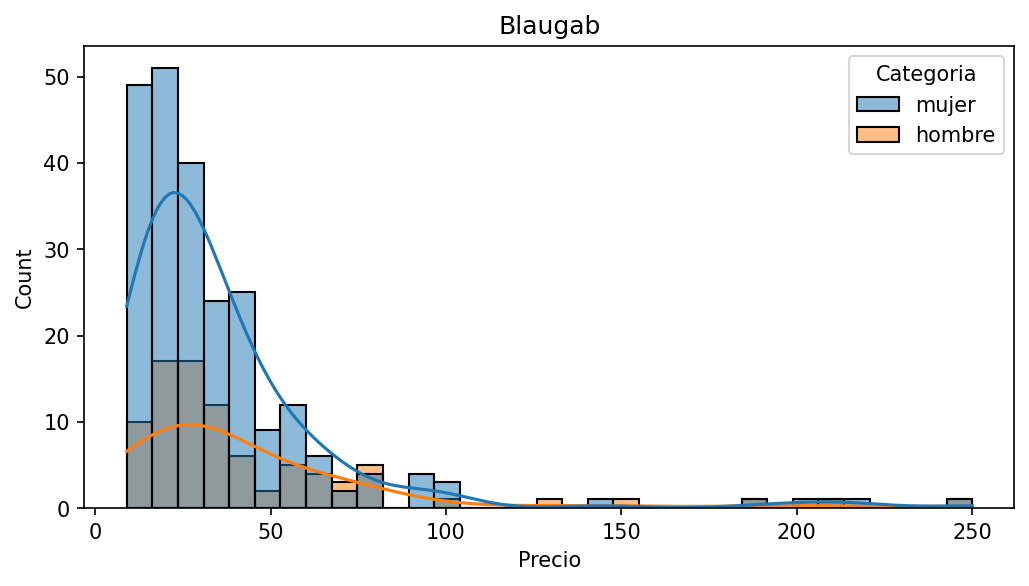

In [134]:
plt.figure(figsize=(8,4), dpi = 150)
plt.title("Blaugab")
sns.histplot(data=blaugab_genero, x = "Precio", hue = "Categoria", kde = True)
plt.show()

In [135]:
get_test(False, blaugab_hombre["Precio"], blaugab_mujer["Precio"])

2 samples:


MannwhitneyuResult(statistic=11803.0, pvalue=0.03317326398841078)

In [246]:
minimalism["subcategoria"].unique()

array(['Camisetas', 'Ropa interior', 'Sudaderas', 'Calcetines', 'Polos',
       'Jerséis', 'Pantalones', 'Mochilas', 'Accesorios', 'Jerseis',
       'Toallas de baño', nan], dtype=object)

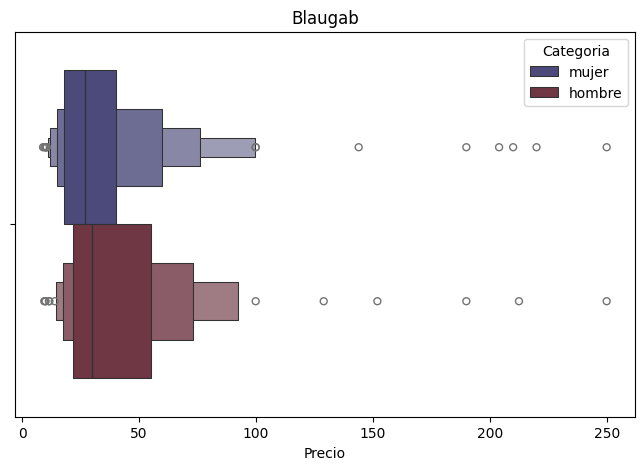

In [137]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Blaugab")
sns.boxenplot(blaugab_genero, x = "Precio", hue = "Categoria", palette="icefire")
plt.show()

In [138]:
get_test(False, mini_generos["precio"], blaugab_genero["Precio"])

2 samples:


MannwhitneyuResult(statistic=36831.0, pvalue=7.029607475362996e-09)

In [154]:
fieito = pd.read_excel("datos/fieito.xlsx", index_col = 0)

In [155]:
fieito_genero = fieito[(fieito["Categoria"] == "Mujer") | (fieito["Categoria"] == "Hombre")]

In [217]:
fieito_mujer = fieito[(fieito["Categoria"] == "Mujer")]
fieito_hombre = fieito[(fieito["Categoria"] == "Hombre")]

fieito_mujer["precio"] = fieito_mujer["precio"].str.replace(',','.').str.replace('€','').astype(float)
fieito_hombre["precio"] = fieito_hombre["precio"].str.replace(',','.').str.replace('€','').astype(float)

C:\Users\yanru\AppData\Local\Temp\ipykernel_17836\3443917996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fieito_mujer["precio"] = fieito_mujer["precio"].str.replace(',','.').str.replace('€','').astype(float)
C:\Users\yanru\AppData\Local\Temp\ipykernel_17836\3443917996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fieito_hombre["precio"] = fieito_hombre["precio"].str.replace(',','.').str.replace('€','').astype(float)


In [171]:
fieito_genero["precio"] = fieito_genero["precio"].str.replace(',','.').str.replace('€','').astype(float)

In [218]:
get_test(False, fieito_hombre["precio"], fieito_mujer["precio"])

2 samples:


MannwhitneyuResult(statistic=12370.5, pvalue=0.3649643840032445)

In [172]:
get_test(False, fieito_genero["precio"], mini_generos["precio"])

2 samples:


MannwhitneyuResult(statistic=33993.0, pvalue=1.9857728208573367e-05)

In [497]:
ecoalf = pd.read_excel("datos/ecoalf.xlsx", index_col=0)

In [506]:
eco_genero = ecoalf[(ecoalf["categoria"] == "Mujer") | (ecoalf["categoria"] == "Hombre")]

In [513]:
eco_genero["precio"] = eco_genero["precio"].str.replace(",",".").astype(float)

In [514]:
mini_generos["tienda"] = "Minimalism"
blaugab_genero["tienda"] = "Blaugab"
fieito_genero["tienda"] = "Fieito"
eco_genero["tienda"] = "EcoAlf"

In [515]:
eco_genero.columns = [c.lower() for c in eco_genero.columns]

In [198]:
blaugab_genero.columns = [c.lower() for c in blaugab_genero.columns]

In [199]:
fieito_genero.columns = [c.lower() for c in fieito_genero.columns]

In [516]:
df_all_gender = pd.concat([mini_generos[["precio", "categoria", "tienda"]], blaugab_genero[["precio", "categoria", "tienda"]], fieito_genero[["precio", "categoria", "tienda"]], eco_genero[["precio", "categoria", "tienda"]]])

In [517]:
df_all_gender.categoria = df_all_gender.categoria.apply(lambda x: x.lower())

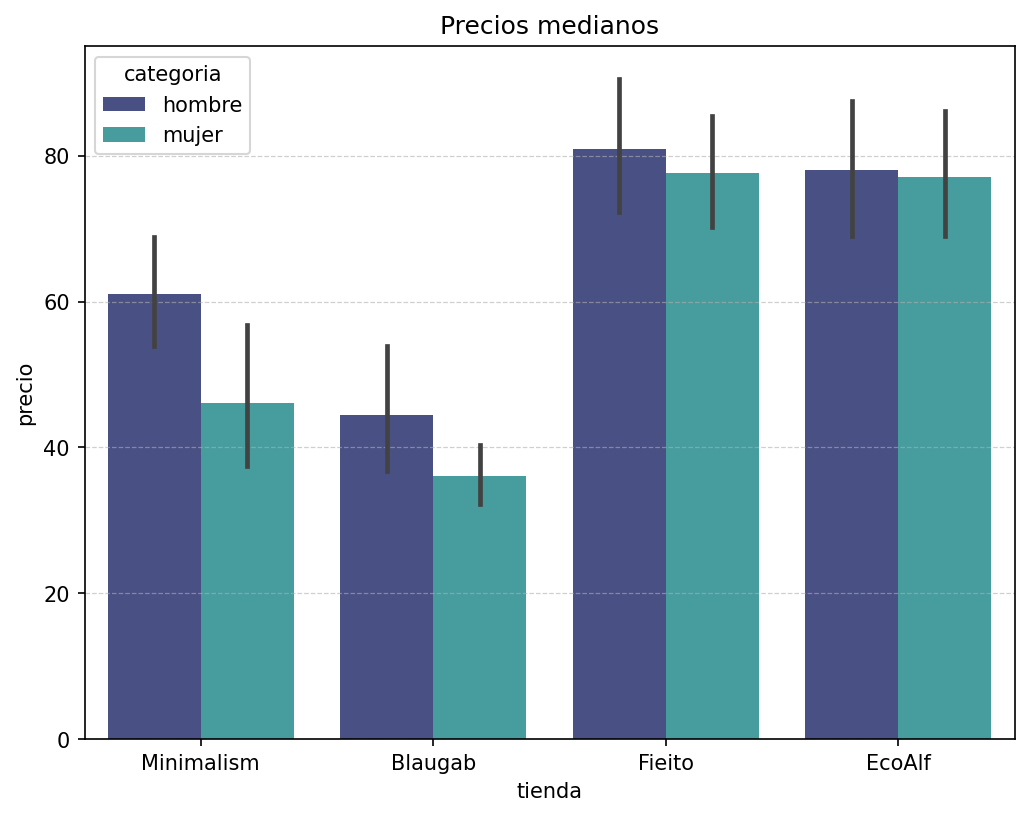

In [518]:
plt.figure(figsize=(8,6), dpi = 150)
plt.title("Precios medianos")
plt.grid(ls = '--', lw = 0.6, alpha = 0.6)
sns.barplot(data = df_all_gender, x = "tienda", y = "precio", hue = "categoria", palette="mako")
plt.show()

In [520]:
len(minimalism["nombre"].unique())

92

In [519]:
len(ecoalf["nombre"].unique())

131

In [522]:
len(blaugab.Nombre.unique())

441

In [388]:
mini_keys = pd.read_excel("datos/Analisis Competencia.xlsx", sheet_name = "Copia de SEO-SEM Minimalism")
fieito_keys = pd.read_excel("datos/Analisis Competencia.xlsx", sheet_name = "SEO-SEM Fieto")
ecoalf_keys = pd.read_excel("datos/Analisis Competencia.xlsx", sheet_name = "SEO-SEM EcoAlf")
blaugab_keys = pd.read_excel("datos/Analisis Competencia.xlsx", sheet_name = "SEO-SEM BlueGap")

In [241]:
ecoalf_keys["Traffic (%)"] = round(ecoalf_keys["Traffic"]/ecoalf_keys["Traffic"].sum()*100, ndigits=2)

In [ ]:
ecoalf_keys["Traffic"].sum()

143304

In [309]:
ecoalf_keys["Traffic Cost"].sum()

30672.0

In [359]:
round(ecoalf_keys["Search Volume"].mean())

275

In [360]:
round(ecoalf_keys["Keyword Difficulty"].mean())

19

In [365]:
round(ecoalf_keys["Position"].mean())

45

In [ ]:
def get_seosem(df):
    df["Traffic (%)"] = round(df["Traffic"]/df["Traffic"].sum()*100, ndigits=2)
    total_traffic = df["Traffic"].sum()
    total_cost_traffic = df["Traffic Cost"].sum()
    volume_mean = round(df["Search Volume"].mean())
    difficulty_mean = round(df["Keyword Difficulty"].mean())
    average_position = round(df["Position"]).mean()
    average_previous_position = round(df["Previous Position"]).mean()
    top_keyword = df.loc[df["Traffic"].idxmax()]["Keyword"]
    cost_per_traffic_unit = df["Traffic"]/df["Traffic Cost"]
    top_keyword = df.loc[cost_per_traffic_unit.idxmax()]["Keyword"]
    return {"Tráfico Total" : total_traffic}
    

In [385]:
def get_seosem(df, tienda):
    # Calculamos el porcentaje de tráfico
    df["Traffic (%)"] = round(df["Traffic"]/df["Traffic"].sum()*100, ndigits=2)
    
    # Cálculos principales
    total_traffic = df["Traffic"].sum()  # Total de tráfico estimado
    total_cost_traffic = df["Traffic Cost"].sum()  # Coste total del tráfico
    volume_mean = round(df["Search Volume"].mean())  # Promedio del volumen de búsqueda
    difficulty_mean = round(df["Keyword Difficulty"].mean())  # Dificultad promedio de palabras clave
    average_position = round(df["Position"].mean(), 2)  # Promedio de posición actual
    average_previous_position = round(df["Previous position"].mean(), 2)  # Promedio de posición anterior

    # Palabra clave que genera más tráfico
    top_keyword = df.loc[df["Traffic"].idxmax()]["Keyword"]
    
    # Mejor palabra clave en términos de costo por tráfico (alta eficiencia)
    cost_per_traffic_unit = df["Traffic"] / df["Traffic Cost"]
    most_expensive_keyword = df.loc[cost_per_traffic_unit.idxmax()]["Keyword"]

    # Tráfico de las principales palabras clave (top 5 en tráfico)
    top_5_keywords_traffic = df.nlargest(5, "Traffic")[["Keyword", "Traffic"]].to_dict(orient="records")
    
    # Cambio promedio en la posición (ver si ha habido mejora o empeoramiento)
    position_change = average_previous_position - average_position
    
    # Distribución de intenciones de búsqueda
    intent_distribution = df["Keyword Intents"].value_counts(normalize=True).round(2).to_dict()
    
    # Agregar todos los valores calculados al diccionario
    return {
        "Tienda" : tienda,
        "Tráfico Total": total_traffic,
        "Costo Total del Tráfico": total_cost_traffic,
        "Volumen Promedio de Búsqueda": volume_mean,
        "Dificultad Promedio de Palabra Clave": difficulty_mean,
        "Posición Promedio Actual": average_position,
        "Posición Promedio Anterior": average_previous_position,
        "Cambio Promedio de Posición": position_change,
        "Palabra Clave con Mayor Tráfico": top_keyword,
        "Palabra Clave de Coste más Alto": most_expensive_keyword,
        "Principales 5 Palabras Clave por Tráfico": top_5_keywords_traffic,
        "Distribución de Intenciones de Búsqueda": intent_distribution
    }


In [392]:
traffic_mini = pd.DataFrame([get_seosem(mini_keys, "Minimalism")])
traffic_fieito = pd.DataFrame([get_seosem(fieito_keys, "Fieito")])
traffic_blaugab = pd.DataFrame([get_seosem(blaugab_keys, "Blaugab")])
traffic_ecoalf = pd.DataFrame([get_seosem(ecoalf_keys, "EcoAlf")])


In [396]:
traffic = pd.concat([traffic_mini,traffic_fieito,traffic_blaugab,traffic_ecoalf]).reset_index(drop=True)

In [397]:
traffic.to_excel("datos/bignumberstraffic.xlsx")

In [340]:
x = ["Minimalism", "Blaugab", "Fieito", "EcoAlf"]*2
rendimiento_movil = [42,53,35,39]
rendimiento_web = [62,85,74,66]
movil = ["movil"] * len(rendimiento_movil)
web = ["web"] * len(rendimiento_web)

rendimientos = pd.DataFrame({"Tienda" : x, "Rendimiento" : rendimiento_movil+rendimiento_web, "Tipo" : movil+web})
display(rendimientos)

,Tienda,Rendimiento,Tipo
0,Minimalism,42,movil
1,Blaugab,53,movil
2,Fieito,35,movil
3,EcoAlf,39,movil
4,Minimalism,62,web
5,Blaugab,85,web
6,Fieito,74,web
7,EcoAlf,66,web


In [492]:
ecoalf = pd.read_excel("datos/ecoalf.xlsx", index_col=0)

In [494]:
blaugab

,Nombre,Precio,Tallas,Subcategoria,Categoria
0,Chaqueta de punto algodón orgánico 100% SCARA,79.99,"['S', 'M', 'L', 'XS']",Mujer,mujer
1,Jersey algodón orgánico manga francesa SIANA,59.99,"['S', 'M', 'L', 'XS']",Mujer,mujer
2,Falda algodón orgánico SARINA,49.99,"['S', 'M', 'XS']",Ropa casual,mujer
3,Cárdigan largo mujer algodón orgánico 100%,59.96,"['S', 'M']",Mujer,mujer
4,Jersey 100% algodón orgánico azul,49.95,"['S', 'M', 'L']",Mujer,mujer
...,...,...,...,...,...
523,Pack de 3 Bragas algodón orgánico,35.95,"['36', '38', '40', '42', '44', '46']",Mujer,mujer
524,Pack de 3 Bragas culotte algodón orgánico,41.95,"['36', '38', '40', '42', '44', '46']",Mujer,mujer
525,"Bragas algodón orgánico panty largo, Modern",17.94,"['36', '38', '40', '42', '44', '46']",Mujer,mujer
526,Haramaki de algodón orgánico reversible Verde ...,44.00,"['S', 'M', 'L', 'XL', 'XS']",Complementos,mujer


In [357]:
# plt.figure(figsize=(8,4), dpi = 200)
# plt.title("Rendimiento por tienda", font = "Arial", fontsize = 16)
# plt.grid(ls = "--", lw = 0.6, alpha = 0.6)
# sns.barplot(rendimientos, x = "Tienda",y ="Rendimiento", hue = "Tipo", palette="mako")
# plt.show()

In [ ]:
x = ["Minimalism", "Blaugab", "Fieito", "EcoAlf"]*2
tiempo_movil = [3.1,1.8,5.7,1.7]
tiempo_web = [2.7,0.5,1.2,1.2]
movil = ["movil"] * len(tiempo_movil)
web = ["web"] * len(tiempo_web)


tiempos = pd.DataFrame({"Tienda" : x, "Tiempo Carga" : tiempo_movil+tiempo_web, "Tipo" : movil+web})
display(tiempos)

,Tienda,Tiempo Carga,Tipo
0,Minimalism,3.1,movil
1,Blaugab,1.8,movil
2,Fieito,5.7,movil
3,EcoAlf,1.7,movil
4,Minimalism,2.7,web
5,Blaugab,0.5,web
6,Fieito,1.2,web
7,EcoAlf,1.2,web


In [364]:
# plt.figure(figsize=(8,4), dpi = 200)
# plt.title("Tiempo de carga por tienda", font = "Arial", fontsize = 16)
# plt.grid(ls = "--", lw = 0.6, alpha = 0.6)
# sns.barplot(tiempos, x = "Tienda",y ="Tiempo Carga", hue = "Tipo", palette="mako")
# plt.show()

In [412]:
searchfor = ['deporte', 'sport', 'entrenar', 'fitness', 'fit', 'yoga']
sum(ecoalf_keys.Keyword.str.contains('|'.join(searchfor)))

303

In [447]:
median_prices = minimalism[~minimalism["nombre"].str.contains('Pack | pack')].groupby("subcategoria")["precio"].median().reset_index().sort_values(by='precio', ascending=False)

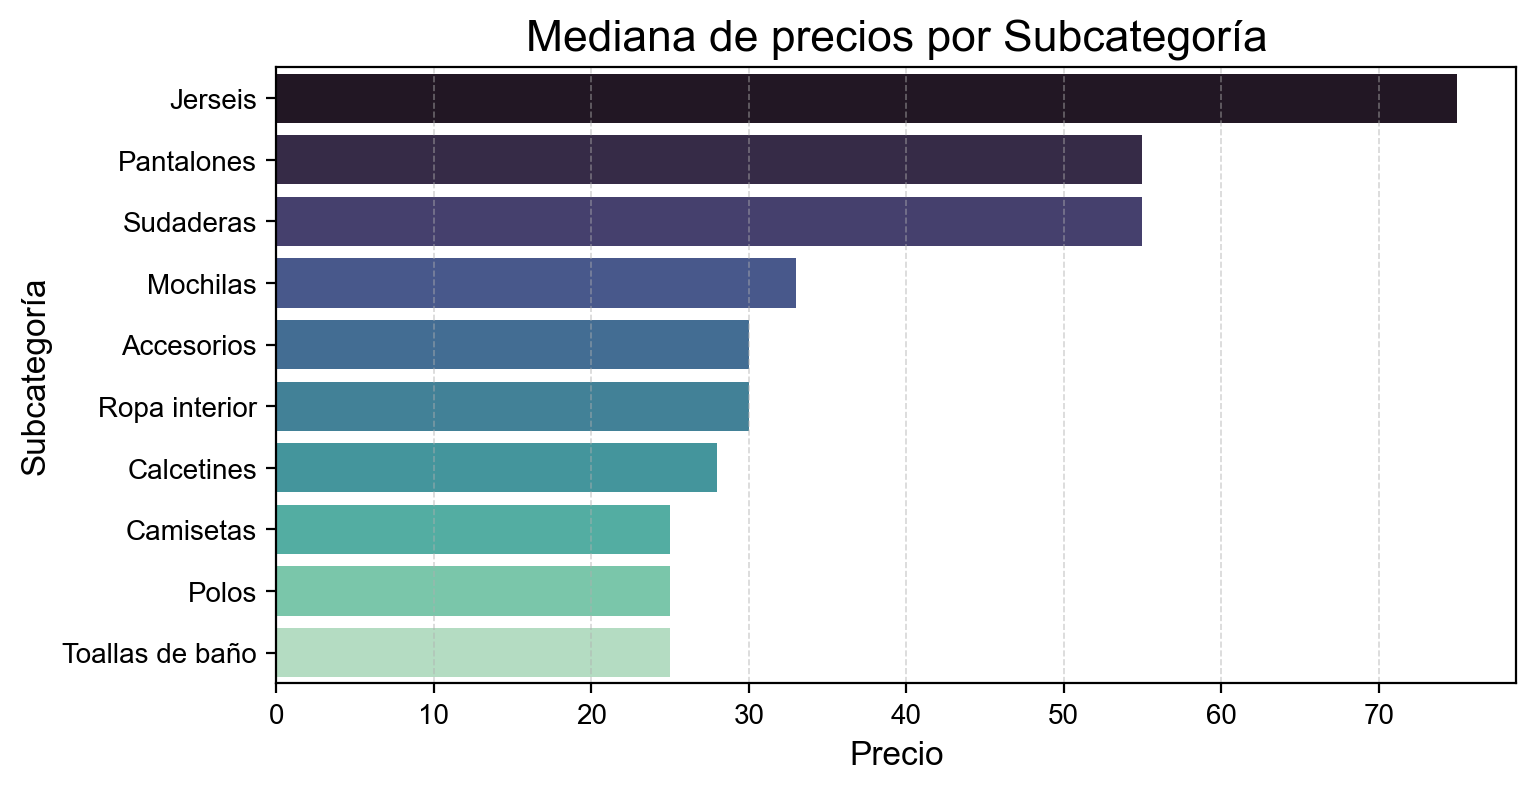

In [468]:
plt.figure(figsize=(8,4), dpi = 200)
plt.title("Mediana de precios por Subcategoría", font = "Arial", fontsize = 16)
plt.grid(ls = '--', lw = 0.6, alpha = 0.5)
sns.barplot(median_prices, y = "subcategoria", x = "precio", palette = "mako")
plt.xlabel("Precio",font = "Arial", fontsize = 12)
plt.ylabel("Subcategoría",font = "Arial", fontsize = 12)
plt.xticks(font = "Arial")
plt.yticks(font = "Arial")
plt.show()

In [ ]:
median_prices

In [472]:
minimalism["agua"].astype(float)

ValueError: could not convert string to float: '1.867.8'